##### Problem 1: Read in the Sacramento housing data set.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
# display plots in the notebook
%matplotlib inline

housing_data = pd.read_csv('data/sacramento_housing_data.csv')
print housing_data.head()

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  


##### Problem 2: Conduct exploratory data analysis on this data set. Report any notable findings here and any steps you take to clean/process data.

Hint: These EDA checks will be on every data set we give you. If checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [41]:
def eda(dataframe):
    
    print "missing values \n", dataframe.isnull().sum()## count number of null values per column
    print ''
    print "dataframe types \n", dataframe.dtypes       ## list data type of each column
    print ''
    print "dataframe shape \n", dataframe.shape        ## rows by columns
    print ''
    print "dataframe describe \n", dataframe.describe()## stats -- mean, min, max, etc.. 
    print ''
    for item in dataframe:                             ## count number of unique values per column
        print item, dataframe[item].nunique()


eda(housing_data)

missing values 
street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

dataframe types 
street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

dataframe shape 
(985, 12)

dataframe describe 
                zip        beds       baths       sq__ft          price  \
count    985.000000  985.000000  985.000000   985.000000     985.000000   
mean   95750.697462    2.911675    1.776650  1312.918782  233715.951269   
std       85.176072    1.307932    0.895371   856.123224  139088.818896   
min    95603.000000    0.000000    0.000000  -984.000000 -210944.000000   
25%    95660.000000    2.000000    1.000000   950.000000  145000.000000   
50%    9

In [42]:
## unique state values = 2 for a CA dataset--check values and fix
housing_data.state.value_counts()
## CA and AC -- fix AC to be CA
housing_data['state'] = ['CA' for state in housing_data['state']]

In [43]:
## there are negative prices and sq__ft
## can't assume they should just be positive, so i'm going to remove them
housing_data = housing_data[(housing_data.price > 0) & (housing_data.sq__ft) > 0]
print housing_data.price.min()
print housing_data.sq__ft.min()


60000
539


##### Problem 3: Our goal will be to predict price. List the variables that qualify as available predictors in a SLR model. For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.

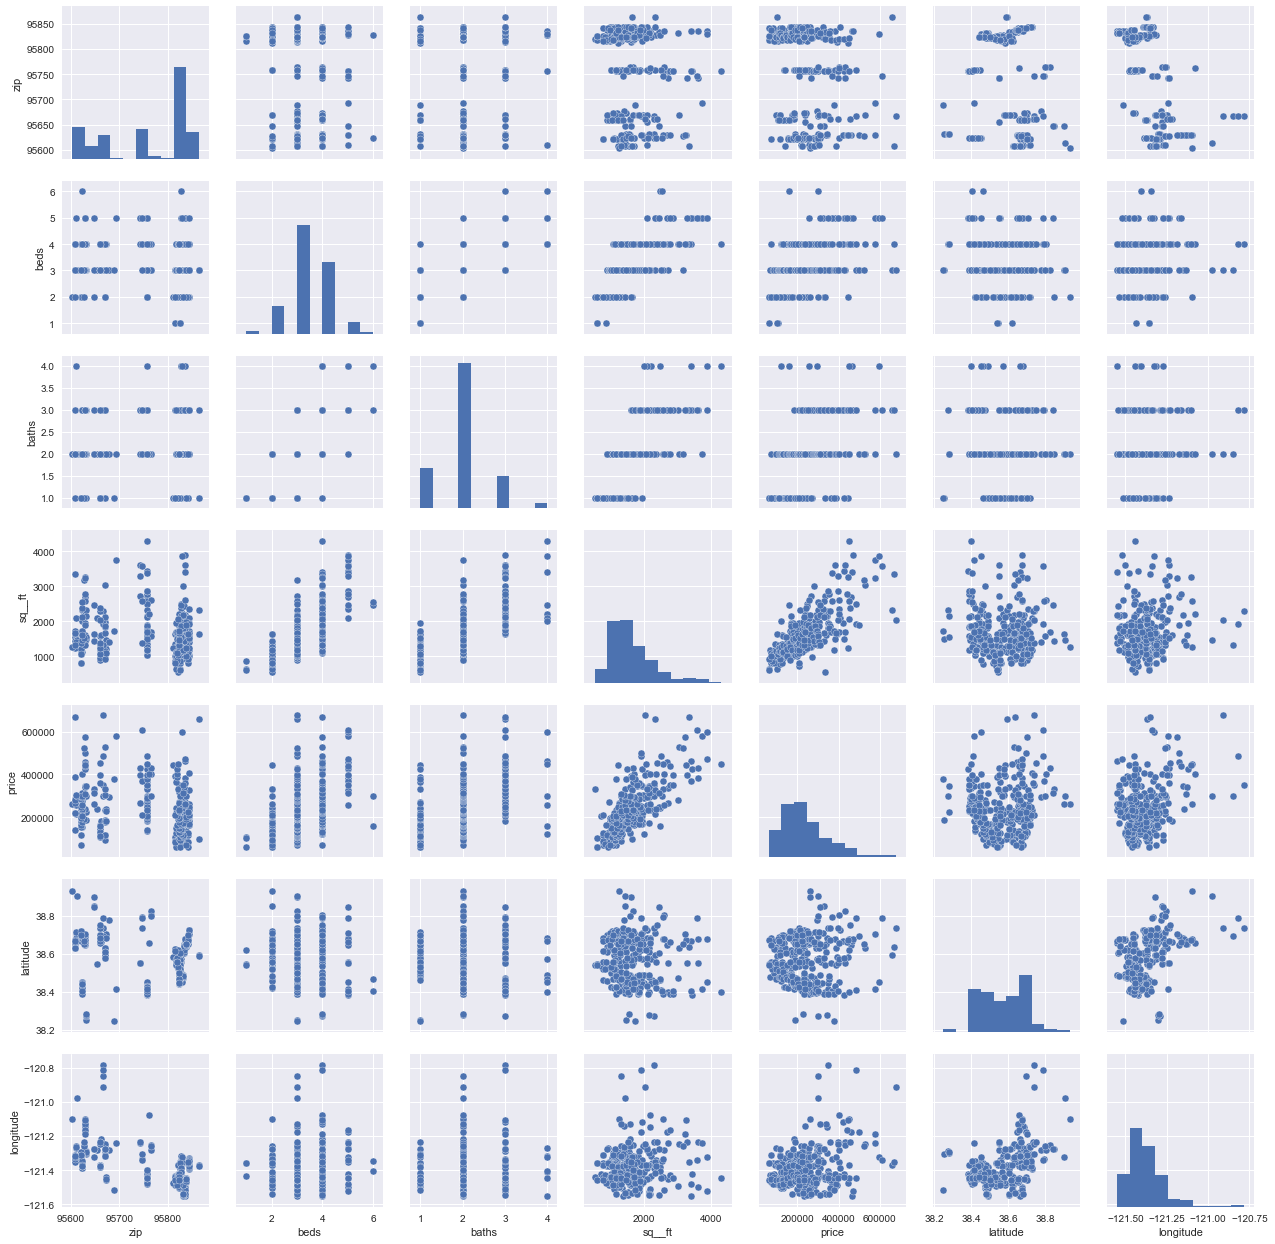

In [6]:
import seaborn as sns
## predictors:
# zip
# sq__ft
# latitude
# longitude

## check out various graphs
sns.pairplot(housing_data)


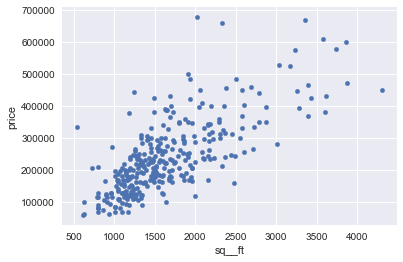

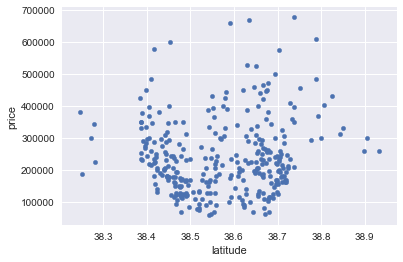

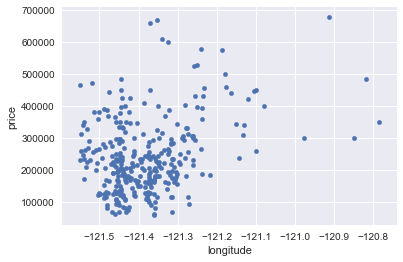

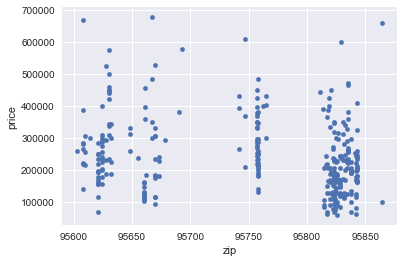

In [44]:
## these are the chosen graphs
housing_data.plot(kind='scatter', x='sq__ft', y='price')
housing_data.plot(kind='scatter', x='latitude', y='price')
housing_data.plot(kind='scatter', x='longitude', y='price')
housing_data.plot(kind='scatter', x='zip', y='price')

# beds_price = housing_data[['beds','price']]
# baths_price = housing_data[['baths','price']]
# type_price = housing_data[['type','price']]
# beds_price.groupby('beds').mean().plot(kind='bar')
# baths_price.groupby('baths').mean().plot(kind='bar')
# type_price.groupby('type').mean().plot(kind='bar')

##### Problem 4: Which independent variable would be the best predictor of Y in a SLR model? Why?

I believe that the sq__ft variable would be the best predictor of Y in a SLR model, so I'm going to check that I can verify each of the 4 assumptions:
Linearity 
Independence
Normality
Equality of Variance

In [46]:
# regressionline = sc.stats.linregress(housing_data['sq__ft'], housing_data['price'])
# print sc.stats.linregress(housing_data['sq__ft'], housing_data['price'])

# m = regressionline[0]
# b = regressionline[1]

# x = np.linspace(0, 18, 100)
# fig = plt.plot(housing_data['sq__ft'], housing_data['price'],'bo')
# plt.plot(x, m*x + b)
# plt.show()

import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='price ~ sq__ft', data=housing_data).fit()

# print the coefficients
lm.params

# Intercept    21519.409206
# sq__ft         132.686725


Intercept    21519.409206
sq__ft         132.686725
dtype: float64

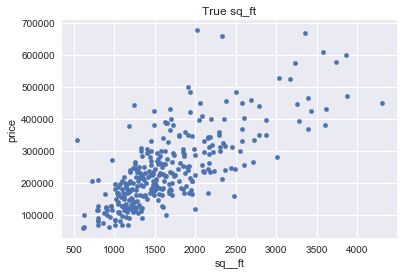

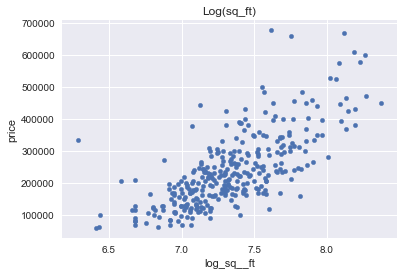

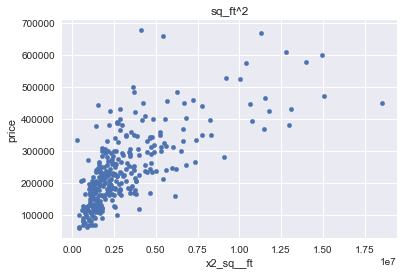

In [69]:
import math
housing_data.dtypes


housing_data['log_sq__ft'] = [math.log(x) for x in housing_data.sq__ft]
housing_data['x2_sq__ft'] = [x**2 for x in housing_data.sq__ft]

housing_data.plot(kind='scatter', x='sq__ft', y='price', title='True sq_ft')
housing_data.plot(kind='scatter', x='log_sq__ft', y='price', title='Log(sq_ft)')
housing_data.plot(kind='scatter', x='x2_sq__ft', y='price', title='sq_ft^2')

log(x) looks pretty good!

##### Problem 5: Build a function that will take in lists Y and X, where Y and X both contain quantitative data, and returns the estimates of $\beta_0$ and $\beta_1$ that minimize SSE. Test your function on price and the variable you determined was best in Problem 4. Report the slope and Y-intercept.

##### Problem 6: Interpret the Y-intercept. Does it make sense to interpret the Y-intercept here?

Double-click here and it will open a "markdown cell." Feel free to edit this and write your answers in here rather than in a commented code cell.

**Optional Note:** If you want to write any math symbols, you can put them inside dollar signs. For example, Y = 2X looks better as $Y = 2X$. If you want to write beta0 or beta1, you write that as $\beta_0$ and $\beta_1$, respectively. **You don't need to typeset your math in this way** - but those of you familiar with LaTeX or Microsoft Word Equation Editor may be comfortable with this.

##### Problem 7: Give an example of how this model could be used for prediction and how this model could be used for inference. Be sure to make it clear which example is associated with prediction and which is associated with inference.

Double-click here and it will open a "markdown cell." Feel free to edit this and write your answers in here rather than in a commented code cell.

**Optional Note:** If you want to write any math symbols, you can put them inside dollar signs. For example, Y = 2X looks better as $Y = 2X$. If you want to write beta0 or beta1, you write that as $\beta_0$ and $\beta_1$, respectively. **You don't need to typeset your math in this way** - but those of you familiar with LaTeX or Microsoft Word Equation Editor may be comfortable with this.

##### Bonus: Using the model you came up with in Problem 5, calculate and plot the residuals.